<a href="https://colab.research.google.com/github/TVAexe/KPDL-24-25/blob/main/Giao_d%E1%BB%8Bch_theo_kho%E1%BA%A3ng_ti%E1%BB%81n_v%C3%A0_theo_gi%E1%BB%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#biểu đồ thống kê số lượng giao dịch theo khoảng tiền của từng ngân hàng

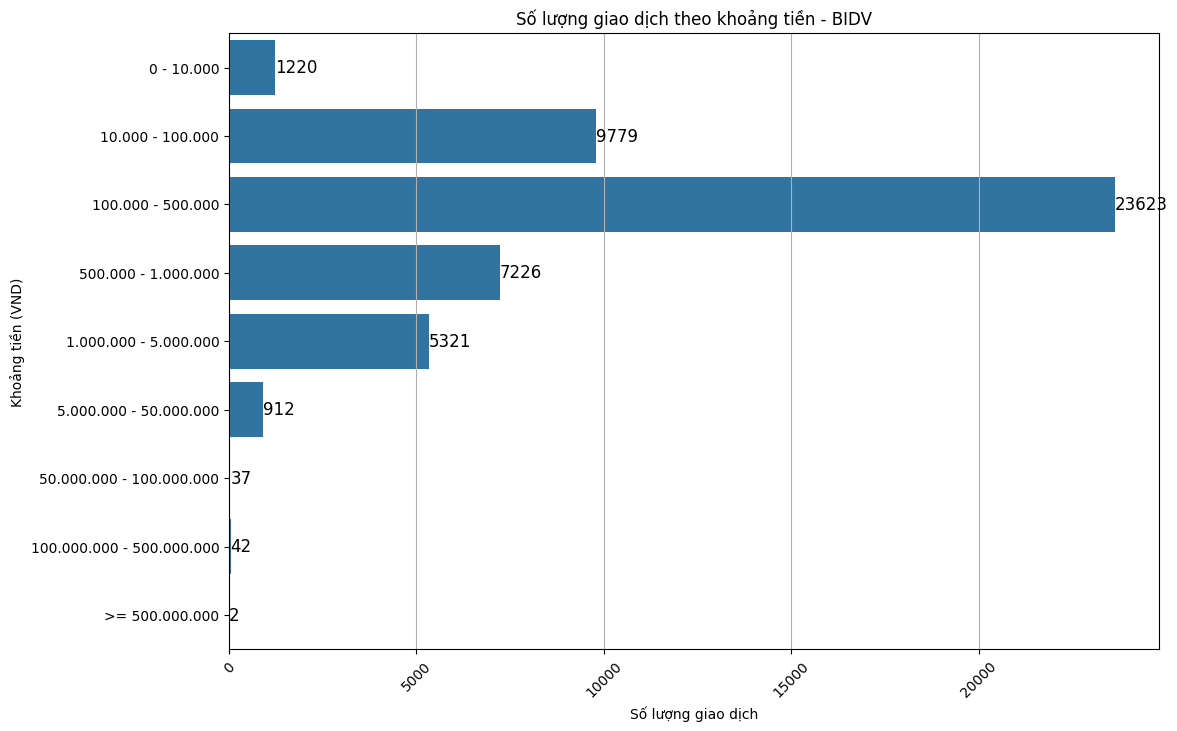

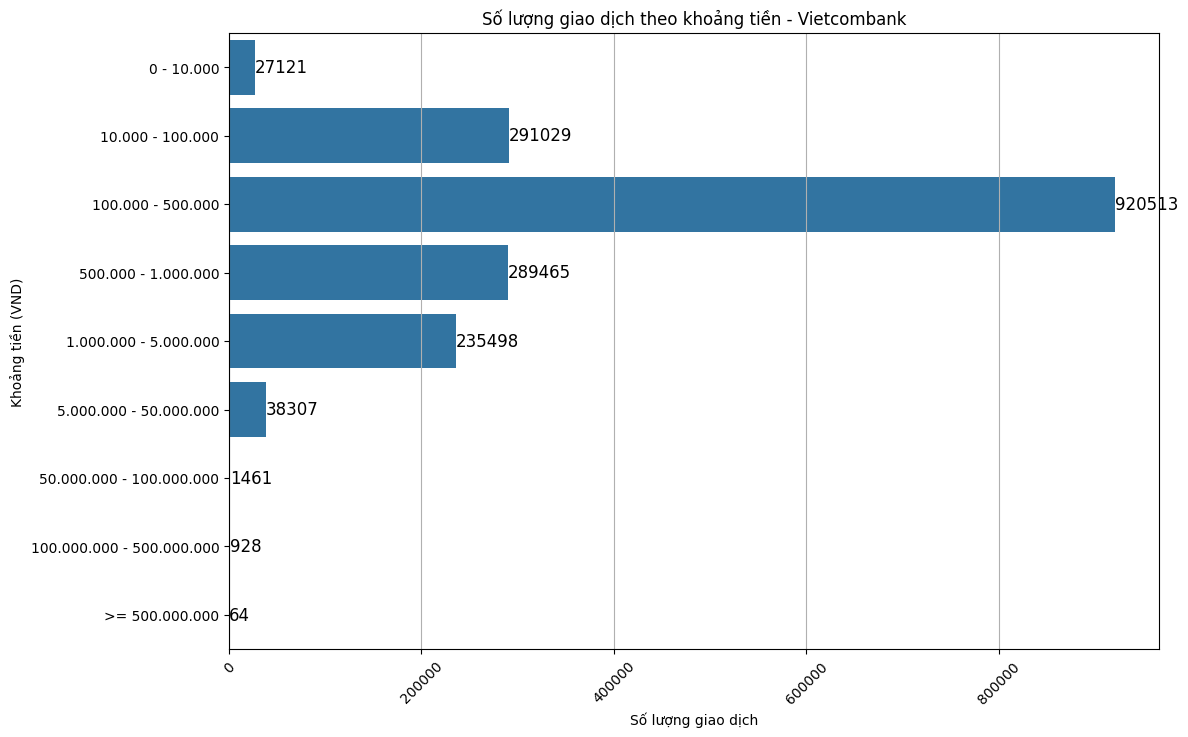

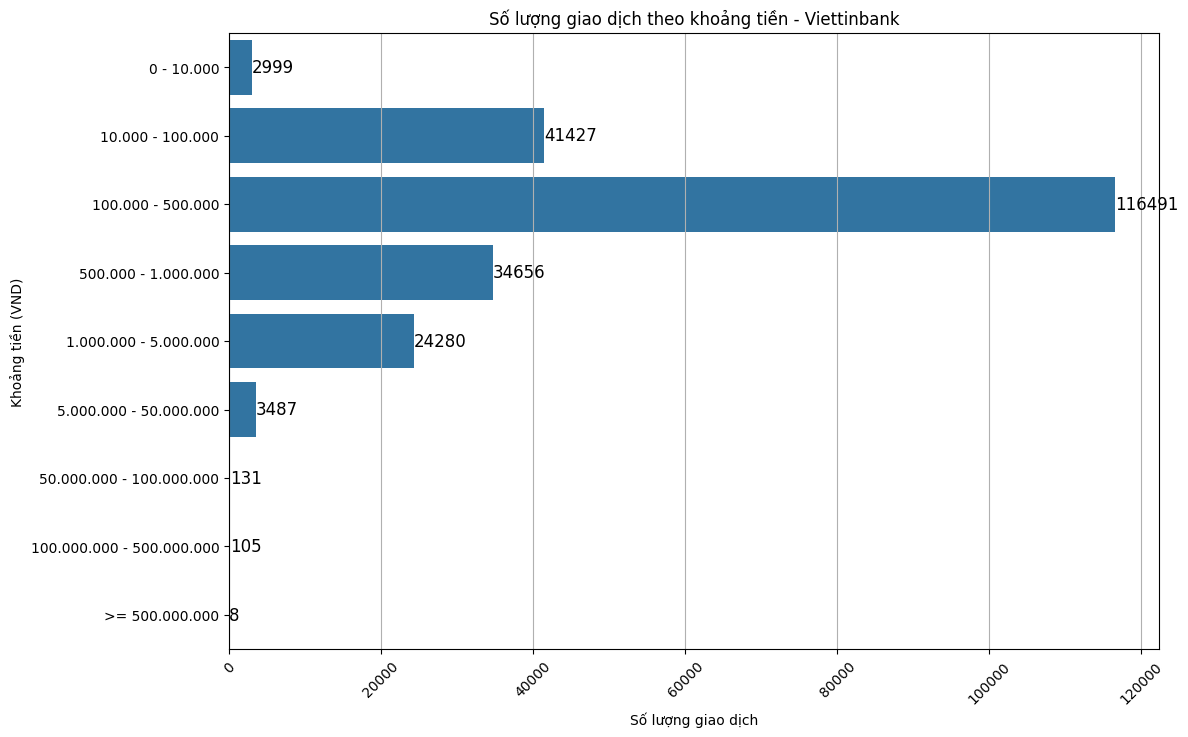

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ ba tệp
file_path_bidv = '/content/drive/MyDrive/bidv4_tapthe.xlsx'
file_path_vcb = '/content/drive/MyDrive/vcb_1-30.csv'
file_path_final_main = '/content/drive/MyDrive/final_main.xlsx'

# Đọc từng tệp và chọn cột chứa số tiền
df_bidv = pd.read_excel(file_path_bidv)
df_vcb = pd.read_csv(file_path_vcb)
df_final_main = pd.read_excel(file_path_final_main)

# Đặt tên cột số tiền thành "Số tiền" trong mỗi tệp để dễ xử lý
df_bidv['Số tiền'] = df_bidv['Số tiền ghi có (VND)']
df_vcb['Số tiền'] = df_vcb['Số tiền']  # Giả sử cột này đã có tên "Số tiền" trong tệp CSV
df_final_main['Số tiền'] = df_final_main['credit_off']

# Xác định các khoảng tiền và nhãn cho từng khoảng
bins = [0, 10000, 100000, 500000, 1000000, 5000000, 50000000, 100000000, 500000000, 1000000000]
labels = ['0 - 10.000', '10.000 - 100.000', '100.000 - 500.000',
          '500.000 - 1.000.000', '1.000.000 - 5.000.000',
          '5.000.000 - 50.000.000', '50.000.000 - 100.000.000',
          '100.000.000 - 500.000.000', '>= 500.000.000']

# Hàm để vẽ biểu đồ cho một DataFrame
def plot_transaction_counts(df, title):
    df['Khoảng tiền'] = pd.cut(df['Số tiền'], bins=bins, labels=labels, right=False)
    transaction_counts = df['Khoảng tiền'].value_counts().sort_index()

    plt.figure(figsize=(12, 8))
    bar_plot = sns.barplot(x=transaction_counts.values, y=transaction_counts.index)

    # Hiển thị số cụ thể trên từng cột
    for p in bar_plot.patches:
        bar_plot.annotate(f'{int(p.get_width())}',
                          (p.get_width(), p.get_y() + p.get_height() / 2),
                          ha='left', va='center',
                          fontsize=12)

    plt.title(title)
    plt.xlabel('Số lượng giao dịch')
    plt.ylabel('Khoảng tiền (VND)')
    plt.xticks(rotation=45)
    plt.grid(axis='x')
    plt.show()

# Vẽ biểu đồ cho từng tệp
plot_transaction_counts(df_bidv, 'Số lượng giao dịch theo khoảng tiền - BIDV')
plot_transaction_counts(df_vcb, 'Số lượng giao dịch theo khoảng tiền - Vietcombank')
plot_transaction_counts(df_final_main, 'Số lượng giao dịch theo khoảng tiền - Viettinbank')


# Số lượng giao dịch của cả 3 ngân hàng theo từng khoảng tiền

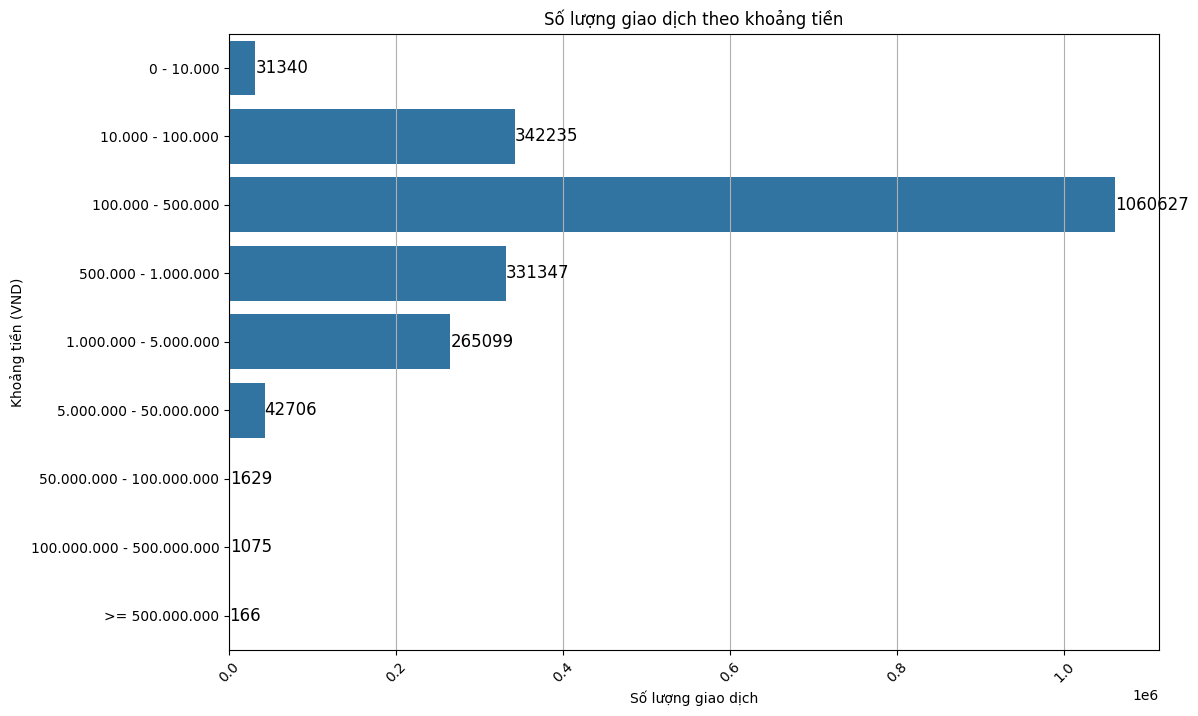

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ ba tệp
file_path_bidv = '/content/drive/MyDrive/bidv4_tapthe.xlsx'
file_path_vcb = '/content/drive/MyDrive/vcb_1-30.csv'
file_path_final_main = '/content/drive/MyDrive/final_main.xlsx'

# Đọc từng tệp và chọn cột chứa số tiền
df_bidv = pd.read_excel(file_path_bidv)
df_vcb = pd.read_csv(file_path_vcb)
df_final_main = pd.read_excel(file_path_final_main)

# Đặt tên cột số tiền thành "Số tiền" trong mỗi tệp để dễ xử lý
df_bidv['Số tiền'] = df_bidv['Số tiền ghi có (VND)']
df_vcb['Số tiền'] = df_vcb['Số tiền']  # Giả sử cột này đã có tên "Số tiền" trong tệp CSV
df_final_main['Số tiền'] = df_final_main['credit_off']

# Kết hợp dữ liệu từ ba tệp vào một DataFrame duy nhất
df_combined = pd.concat([df_bidv[['Số tiền']], df_vcb[['Số tiền']], df_final_main[['Số tiền']]])

# Xác định các khoảng tiền và nhãn cho từng khoảng
bins = [0, 10000, 100000, 500000, 1000000, 5000000, 50000000, 100000000, 500000000, float('inf')]
labels = ['0 - 10.000', '10.000 - 100.000', '100.000 - 500.000',
          '500.000 - 1.000.000', '1.000.000 - 5.000.000',
          '5.000.000 - 50.000.000', '50.000.000 - 100.000.000',
          '100.000.000 - 500.000.000', '>= 500.000.000']

# Phân loại số tiền vào khoảng tiền
df_combined['Khoảng tiền'] = pd.cut(df_combined['Số tiền'], bins=bins, labels=labels, right=False)

# Tính số lượng giao dịch theo từng khoảng tiền
transaction_counts = df_combined['Khoảng tiền'].value_counts().sort_index()

# Vẽ biểu đồ Thanh nằm ngang
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=transaction_counts.values, y=transaction_counts.index)

# Hiển thị số cụ thể trên từng cột
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_width())}',
                      (p.get_width(), p.get_y() + p.get_height() / 2),
                      ha='left', va='center',
                      fontsize=12)

plt.title('Số lượng giao dịch theo khoảng tiền')
plt.xlabel('Số lượng giao dịch')
plt.ylabel('Khoảng tiền (VND)')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()


#Giao dịch theo giờ của tất cả giao dịch

<ipython-input-60-3749bf3b0488>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vcb.loc[:, 'hour'] = df_vcb['Ngày GD'].dt.hour
<ipython-input-60-3749bf3b0488>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bidv.loc[:, 'hour'] = df_bidv['Thời gian chuyển khoản'].dt.hour


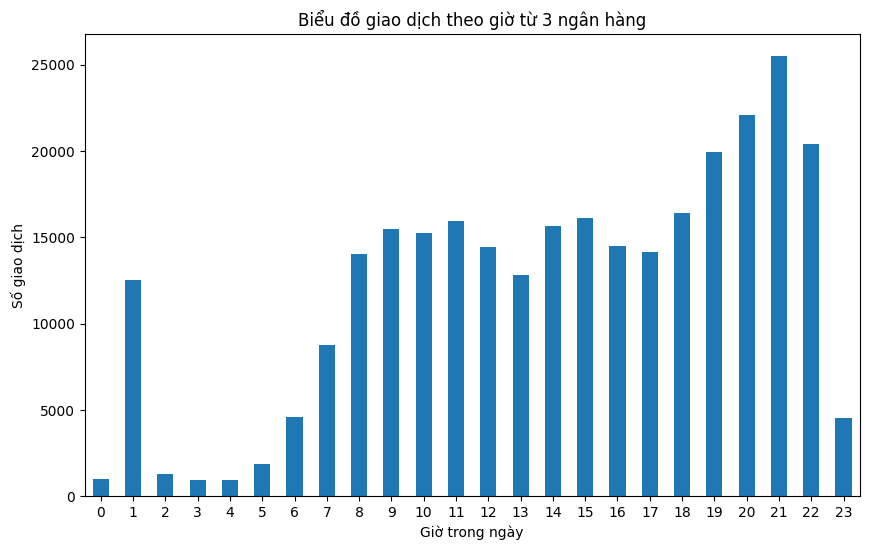

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn tới các file và cột tương ứng
file_path_vcb = '/content/drive/MyDrive/Bản sao của vcb_1-30.csv'
file_path_bidv = '/content/drive/MyDrive/bidv4_tapthe.xlsx'
file_path_viettin = '/content/drive/MyDrive/final_main.xlsx'

# Đọc dữ liệu từ các file
df_vcb = pd.read_csv(file_path_vcb)
df_bidv = pd.read_excel(file_path_bidv)
df_viettin = pd.read_excel(file_path_viettin)

# Chuyển đổi các cột thời gian về dạng datetime và chỉ lấy giờ
df_vcb['Ngày GD'] = pd.to_datetime(df_vcb['Ngày GD'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df_bidv['Thời gian chuyển khoản'] = pd.to_datetime(df_bidv['Thời gian chuyển khoản'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df_viettin['date_time'] = pd.to_datetime(df_viettin['date_time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Lọc chỉ lấy giờ, bỏ qua các dòng không có giờ
df_vcb = df_vcb[df_vcb['Ngày GD'].notna()]
df_bidv = df_bidv[df_bidv['Thời gian chuyển khoản'].notna()]
df_viettin = df_viettin[df_viettin['date_time'].notna()]

# Sử dụng .loc để gán giá trị cho cột 'hour'
df_vcb.loc[:, 'hour'] = df_vcb['Ngày GD'].dt.hour
df_bidv.loc[:, 'hour'] = df_bidv['Thời gian chuyển khoản'].dt.hour
df_viettin.loc[:, 'hour'] = df_viettin['date_time'].dt.hour

# Gộp tất cả dữ liệu lại thành một dataframe
all_data = pd.concat([df_vcb['hour'], df_bidv['hour'], df_viettin['hour']], axis=0)

# Đếm số giao dịch theo từng giờ
transaction_count_per_hour = all_data.value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
transaction_count_per_hour.plot(kind='bar')
plt.title('Biểu đồ giao dịch theo giờ từ 3 ngân hàng')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số giao dịch')
plt.xticks(rotation=0)
plt.show()
